# Constrained optimization and Karush Kuhn Tucker condition (KKT condition)

- toc:true
- badges: true
- author: Phan Anh
- categories: [optimization,]

Suppose we are minimizing a function $f(x)$, with contour line shown in the illustration below. These lines denotes points with the same function value. In the mountain landscape analogy, these line are projection of the altitude on a flat surface such as a map.

The shaded gray region represents a constraint that the solution must satisfy: $g_i(x) < 0$.

The KKT conditions allows us to narrow down the number of potential optimum candidates. Among these conditions, the most interesting one is complementary slackness. This condition states that, either the constraint have no impact on the original optimum, or the optimum lies on the boundary of the constraint.

This post aims to explain the intuition behind teh KKT conditions. We will start by defining the problem and stating the conditions in a somewhat theoretical manner. Then, we will come back to the illustration and see why the conditions make sense.


![KKT conditions illustration](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/Inequality_constraint_diagram.svg/955px-Inequality_constraint_diagram.svg.png)

Image from https://en.wikipedia.org/wiki/Karush%E2%80%93Kuhn%E2%80%93Tucker_conditions


## Constrained optimization

We start by writing down the problem of minimizing a function, with m inequality constraints indexed by i, and l equality contraints indexed by j.

\begin{align}
\min_x f(x)
\\
\text{under constraint:}
\\
g_i(x) \leq 0 ; \forall i = 1...m
\\
h_j(x) = 0 ; \forall j = 1...l
\end{align}

It seems very cumbersome to carry this whole bunch of constraints around while looking for the optimum. To simplify the task, let's incorporate the constraints into the objective function. Instead of ensuring the constraint satisfaction, we will impose a penalty for constraint violation. This technique is known as Lagrangian relaxation.

We will refer to this new objective with the penalty incorporated in as the Lagrangian function:

\begin{align}
\min L(x, \mu, \lambda) = \underbrace{f(x)}_{\text{original objective}} + \underbrace{\sum_{i=1}^m \mu_i g_i(x)}_{\text{inequality penalty}} + \underbrace{\sum_{j=1}^l \lambda_j h_j(x)}_{\text{equality penalty}}
\\
\text{under condition:}
\\
\mu_i \geq 0; \forall i = 1...m
\end{align}

What we did was adding all the constraints into the objective, with a multiplier in front. These multipliers become additional variables (dual variables) of the new objective function. The next section will explain why this becomes a penalty for constraint violation.

<!-- ## Inequality constraint penalty

Let's examine the first new term coming from the inequality constraints:
\begin{align}
\sum_{i=1}^m \mu_i g_i(x)  = \mu_1 g_1(x) + ... + \mu_m g_m(x)
\end{align}
The original inequality constraints is:
$$ g_i(x) \leq 0 ; i = 1...m $$
If an inequality constraint is violated, then:
$$ g_i(x) > 0 $$
We impose that the multipliers must be positive or zero:
$$ \mu_i \geq 0 $$
The product will then be positive or zero:
$$ \mu_i g_i(x) \geq 0 $$
As we add these terms into the minimization objective, they will become a penalty if the inequality constraints are violated.

Later on, we will see in which case we can set the multiplier $\mu_i = 0$, and forget about some inequality constraints. Actually, this product will always be 0 at the optimum, as dictated by the KKT condition that we will get to shortly. -->

## Equality constraint penalty

Let's look at the second new term coming from the equality constraints:
\begin{align}
\sum_{j=1}^l \lambda_j h_j(x) = \lambda_1 h_1(x) + ... + \lambda_l h_l(x)
\end{align}
The original inequality constraints is:
$$ h_j(x) = 0 ; j = 1...l $$
If an equality constraint is violated, then:
$$ h_j(x) \neq 0 $$

Remember that we are minimizing the Lagrangian function, in other words, the original objective function with incorporated constraint penalty:

\begin{align}
\min L(x, \mu, \lambda) = \underbrace{f(x)}_{\text{original objective}} + \underbrace{\sum_{i=1}^m \mu_i g_i(x)}_{\text{inequality penalty}} + \color{red}{ \underbrace{\sum_{j=1}^l \lambda_j h_j(x)}_{\text{equality penalty}} }
\end{align}

What happens when an equality constraint is violated? Since $h_j(x) \neq 0$, there is an easy way to cheat with the minimization objective.

If $h_j(x) > 0$, set $\lambda_j = - \infty$.

If $h_j(x) < 0$, set $\lambda_j = + \infty$.

$=> \lambda_j h_j(x) = - \infty$, in either case.

\begin{align}
\min L(x, \mu, \lambda) = \underbrace{f(x)}_{\text{original objective}} + \underbrace{\sum_{i=1}^m \mu_i g_i(x)}_{\text{inequality penalty}} + \color{red}{ \underbrace{(-\infty)}_{\text{equality penalty}} }
\end{align}

The equality penalty blows up the minimization objective. It messes up everything and the minimum is now ill-defined. That is the penalty for violating the constraint. We had better respect it or everything will fall apart.


## Minus infinity minimum

In practice, I am unable to find any example for the minus infinity minimum case. There will be physical constraint limiting the minimal value. For instance, if I am trying to dive as deep as possible into the ocean, then what I am minimizing is very simple:

$$\min_x f(x) = x$$

Here, $x$ is my negative altitude below sea level. That value is limited by several factors, for example: the altitude of the seabed, or the amount of oxygen that I can carry with me for a diving trip. There is no way of violating these constraints.

Diving to altitude minus infinity only exists in theory, not in practice.

Thus, the equality constraint penalty that we set up in the Langragian function has fulfilled its duty. When the equality constraint is violated, the penalty will give us back the insensible minimum value of minus infinity.


## Inequality constraint penalty

Let's examine the first new term coming from the inequality constraints:
\begin{align}
\sum_{i=1}^m \mu_i g_i(x)  = \mu_1 g_1(x) + ... + \mu_m g_m(x)
\end{align}
The original inequality constraints is:
$$ g_i(x) \leq 0 ; i = 1...m $$
If an inequality constraint is violated, then:
$$ g_i(x) > 0 $$
We impose that the multipliers must be positive or zero:
$$ \mu_i \geq 0 $$
The product will then be positive or zero:
$$ \mu_i g_i(x) \geq 0 $$
As we add these terms into the minimization objective, they will become a penalty by increasing the minimization objective value if the inequality constraints are violated.

\begin{align}
\min L(x, \mu, \lambda) = \underbrace{f(x)}_{\text{original objective}} + \color{red} { \underbrace{\sum_{i=1}^m \mu_i g_i(x)}_{\text{inequality penalty}} } +  \underbrace{\sum_{j=1}^l \lambda_j h_j(x)}_{\text{equality penalty}}
\end{align}

But the cheat with infinity can happens here too. When the constraint is satisfied but not saturated, in other words:
$$ g_i(x) < 0 $$
(instead of $g_i(x) \leq 0$)

By setting $\mu_i = + \infty$, the product will be minus infinity:
$$ \mu_i g_i(x) = - \infty $$

The minimum will be ill-defined, as with the cheat for equality constraint:

\begin{align}
\min L(x, \mu, \lambda) = \underbrace{f(x)}_{\text{original objective}} + \color{red} { \underbrace{ (- \infty) }_{\text{inequality penalty}} } +  \underbrace{\sum_{j=1}^l \lambda_j h_j(x)}_{\text{equality penalty}}
\end{align}

Among the KKT conditions, the complementary slackness condition demands that the product $\mu_i g_i(x) = 0$, so the minus infinity case never happens.

Next, we will get to the KKT conditions themselves and clarify everything.

## Optimality necessary conditions

We rewrite the objective in vector format to simplify notation:
\begin{align}
\min L(x, \mu, \lambda) = f(x) + \mu^T g(x) + \lambda^T h(x)
\\ \\
\mu = \begin{bmatrix} \mu_1 \\ \vdots \\ \mu_m \end{bmatrix} ;
g(x) = \begin{bmatrix} g_1(x) \\ \vdots \\ g_m(x) \end{bmatrix} ;
\lambda = \begin{bmatrix} \lambda_1 \\ \vdots \\ \lambda_m \end{bmatrix} ;
h(x) = \begin{bmatrix} h_1 \\ \vdots \\ h_m(x) \end{bmatrix} ;
\\ \\
\mu^T g(x) = \mu_1 g_1(x) + ... + \mu_m g_m(x)
\\
\lambda^T h(x) = \lambda_1 h_1(x) + ... + \lambda_l h_l(x)
\end{align}


An optimum of this optimization problem must satify all these conditions:

1. Stationarity:

$$ \nabla_x L(x, \mu, \lambda) = \nabla_x f(x) + \mu^T \nabla_x g(x) + \lambda^T \nabla_x h(x) = 0  $$
This is the classic optimality condition: at an optimum, the gradient must be 0. If gradient is anything other than zero, then we can find a lower objective value my moving in the opposite direction of the gradient. The optimum must be lower than all surrounding points, thus the gradient have to be zero.

2. Primal feasibility:

\begin{align}
g_i(x) \leq 0 ; \forall i = 1...m
\\
h_j(x) = 0 ; \forall j = 1...l
\end{align}

Just copy and paste the original inequality and equality constraint.

3. Dual feasibility:

$$ \mu_i \geq 0 ; \forall i = 1...m $$

As we have seen in the inequality constraint section, this condition ensures that the penalty for violating the inequality constraints has the correct sign.

4. Complementary slackness:

$$ \mu_i g_i(x) = 0 ; \forall i = 1...m $$
This condition is the key to help us solve for optimality. Each inequality constraint can only be in either one of 2 cases: $\mu_i = 0$  or $g_i(x) = 0$.

In the first case $\mu_i = 0$, the constraint has no impact on the optimal solution. We can ignore this constraint.

In the second case $g_i(x) = 0$, the inequality becomes equality, thus it is easier to solve. The optium lies on the boundary of the feasible region.

Let's illustrate complementary slackness with an example.

## Complementary slackness illustration

We will take as example this simple minimization:

$$ \min_{x_1, x_2} f(x_1, x_2) = x_1^2 + x_2^2 $$

The global minimum is (0, 0). Next, we will plot the value and contour plot of this function around the minimum.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x1, x2)
y = x1**2 + x2**2

[Text(0.5, 0, 'x1'), Text(0.5, 0.5, 'x2'), Text(0.5, 0, 'f(x)')]

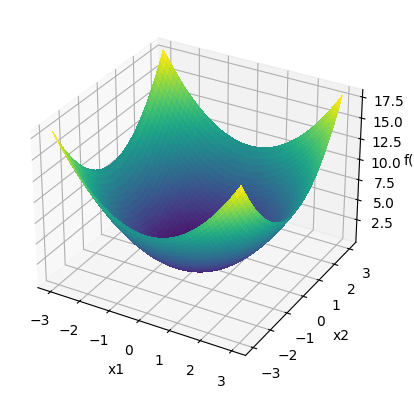

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surface = ax.plot_surface(x1, x2, y, cmap="viridis", linewidth=0, antialiased=False)
ax.set(xlabel='x1', ylabel='x2', zlabel='f(x)')

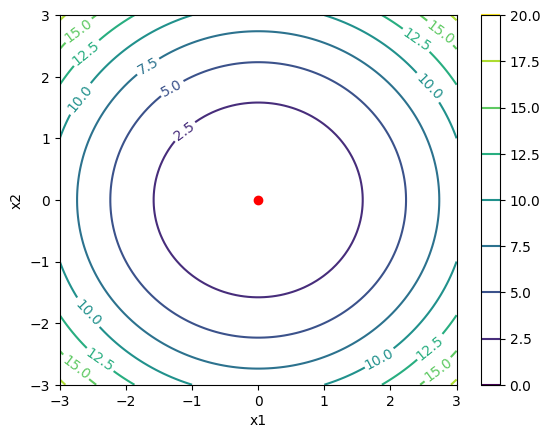

In [ ]:
contour = plt.contour(x1, x2, y, cmap="viridis")
plt.clabel(contour, inline=True, fontsize=10)
plt.plot(0, 0, marker='o', color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()


The red dot in the contour plot represents the global minimum (0, 0). Now we will add an inequality constraint:
$$ g(x) =  x_1 - 1 \leq 0 \implies x_1 \leq 1 $$

Let's plot this constraint along with the original contour plot. We will add a gray shade to the infeasible region $ x_1 > 1 $.

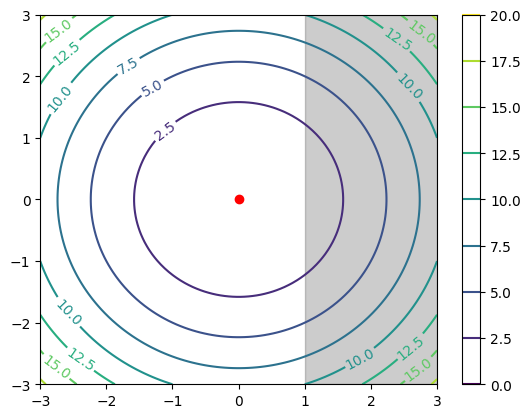

In [ ]:
contour = plt.contour(x1, x2, y, cmap="viridis")
plt.clabel(contour, inline=True, fontsize=10)
plt.plot(0, 0, marker='o', color='red')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axvspan(1, 3, color='black', alpha=0.2)


In this case, the constraint has no impact on the original optimum. Since the original minimum (0, 0) is inside the feasible region, it is still the optimum for the constrained optimization. Coming back to complementary slackness and KKT condition, the inequality multiplier $\mu = 0$.

Now, let's consider another constraint and plot it:
$$ g(x) =  x_1 + 1 \leq 0 \implies x_1 \leq -1 $$


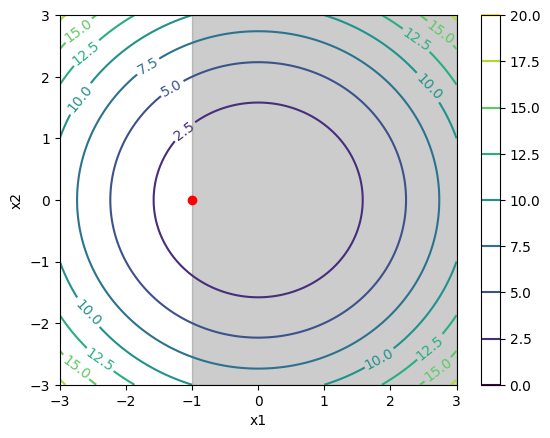

In [ ]:
contour = plt.contour(x1, x2, y, cmap="viridis")
plt.clabel(contour, inline=True, fontsize=10)
plt.plot(-1, 0, marker='o', color='red')
plt.colorbar()
plt.xlabel('x1')
plt.ylabel('x2')
plt.axvspan(-1, 3, color='black', alpha=0.2)


The original minimum (0, 0) is now inside the infeasible region. Thus, it can no longer be the optimum of the constrained optimization. Complementary slackness tells us: the optimum must lies on the boundary. On the line $x_1 = -1$, the point with the lowest objective function value is (-1, 0).

It is easy and intuive to see why (-1, 0) is the new minimum for the constrained minimization. We want to find the closest point to the original minimum (0, 0). Due to the constraint, the closest that we can get to the right is the boundary $x_1 = -1$. On this line, the closest vertical point to (0, 0) is (-1, 0).

## Conclusion

The KKT conditions helps us to solve for the optimum of a constrained optimization problem. Among these conditions, the most essential condition is complementary slackness.

Complementary slackness may appear confusing at first, but we have seen with the illustrations that it is actually very intuitive. As optimization is about finding the extreme, we must go to the extreme of the feasible region to find the optimum. If we fail to find the optimum there, then we can ignore this constraint, because the original unconstrained optimum is unaffected by the constraint.

To sum up the intuition behind complementary slackness, let's consider the diving analogy again. If I am trying to dive as deep as possible into the ocean, then I am minimizing my negative altitude below the sea level.

If my oxygen tank only allows me to dive 100 meters deep, then the constraint is
$$ altitude \leq -100 $$
My minimum altitude is precisely at the boundary of what is feasible, or 100 meters deep:
$$ \min (altitude) = -100 $$

Meanwhile, if the seabed where I am diving is only 5 meters deep, then the oxygen capacity constraint of diving 100 meters deep or less becomes irrelevant. The minimum altitude will always be -5. I can even dive without oxygen tank and forget about the constraint.